In [108]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# Chordal Graphs

Recall that a **chordal graph** is a graph is a graph where every cycle of 4 or more has a chord, where a chord is a an edge connecting two non-consecutive vertices on the cycle.

Chordal graphs were studied in 1961 by Dirac who called them *rigid circuit graphs*. Over the years chordal graphs have been well studied and are one of the most important and intersting family of graphs because of their charactersitic and properties. Many alogirhtmic problems that are NP-complete can be completed in polynomial time for chordal graphs making them extremely important and desirable from an algorithmic graph theory stand point.

There are also many applications of chordal graphs from databases to computational biology and we will explore some of these applications throughout this section. 

# Chordal Graph Characteristics

## Interval Graphs
A **interval graph** is an  <a href="IntroToGraphTheory.ipynb">intersection graph</a> for a family of intervals on the real line. 

***Theorem: Every interval graph is a chordal.***

**Proof:** If we have an interval graph where we do NOT have four or more intervals on the real line that intersect than we automatically have a chordal graph because there is no way to have a cycle of 4 or more. 
Now let us assume that we have an interval graph which represents four or more interval on the real line that intersect. In order to have an interval graph that is NOT chordal, then every cycle of 4 or more must not have a chord, which means that every consecutive interval must intersect and non-consecutive intervals must NOT intersect. However to have a cycle our last interval must be equal to the first, so it is then impossible to not intersect one of the other intervals. To see this let our interval graph satsify the above condition. Let there be a cycle $(v_0, v_1, ..., v_k = v_0)$ where $k \geq 4$. Then for any point $a_i \in v_i \cap v_{i+1}$ for $i = 0, \dots, k-1$ we have distinct points $a_0, \dots, a_{k-1}$ since non consective intervals $v_i, v_j$ have empty intersection, $v_i \cap v_j = \emptyset$. Let us now look at $a{i-1}, a_i, a_{i+1}$. We know that either $a_{i-1} < a_i$ or $a_{i-1} > a_i$. First let us look at the case where $a_{i-1} < a_i$, then $a_i < a_{i+1}$, but this means that $a_{i-1}, a_i \subseteq v_i$ and $(a_i, a_{i+1} \subseteq v_{i+1}$ intersect which contradicts our assumption that non-consecutive intervals do not intersect. Without loss of generality we can see the same thing when $a_{i-1} > a_i$. Now let us examine this for a cycle of 4 or more. Then we either have $a_0 < a_1 < \dots < a_{k-1}$ or $a_0 > a_1 > \dots > a_{k-1}$ and if we look at the points $a_0, a_1, a_{k-1}$ we can see that the same argument from above holds. Thus there exists a chord since $v_{k-1}$ and $v_0$ intersect. 

Below is an example of an interval graph where non-consecutive intervals do NOT intersect. You can see that it results in a graph with no cycles. The next example is one where we have 5 intervals with the last interval being the first and we can see that there is a chord in our cycle. 

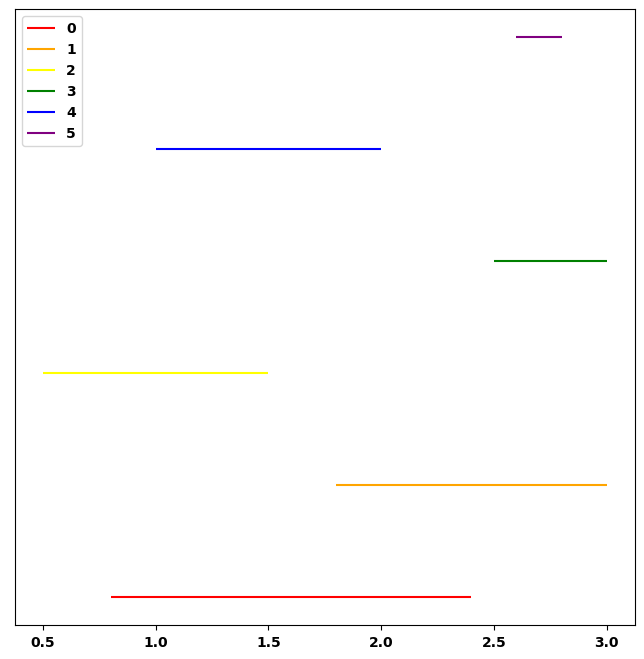

In [95]:
# Intervals where non-consecutive intervals do NOT intersect

intervals = [(0.8, 2.4), (1.8, 3), (0.5, 1.5), (2.5, 3), (1, 2), (2.6, 2.8)]

num_intervals = len(intervals)
viridis = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Purple']

fig, ax = plt.subplots()
for idx, (min_int, max_int) in enumerate(intervals):
  ax.hlines(y=idx, xmin=min_int, xmax=max_int, colors=viridis[idx], label=idx)
ax.legend(loc='upper left')
plt.yticks([], [])

plt.savefig('intervalFamily.png')


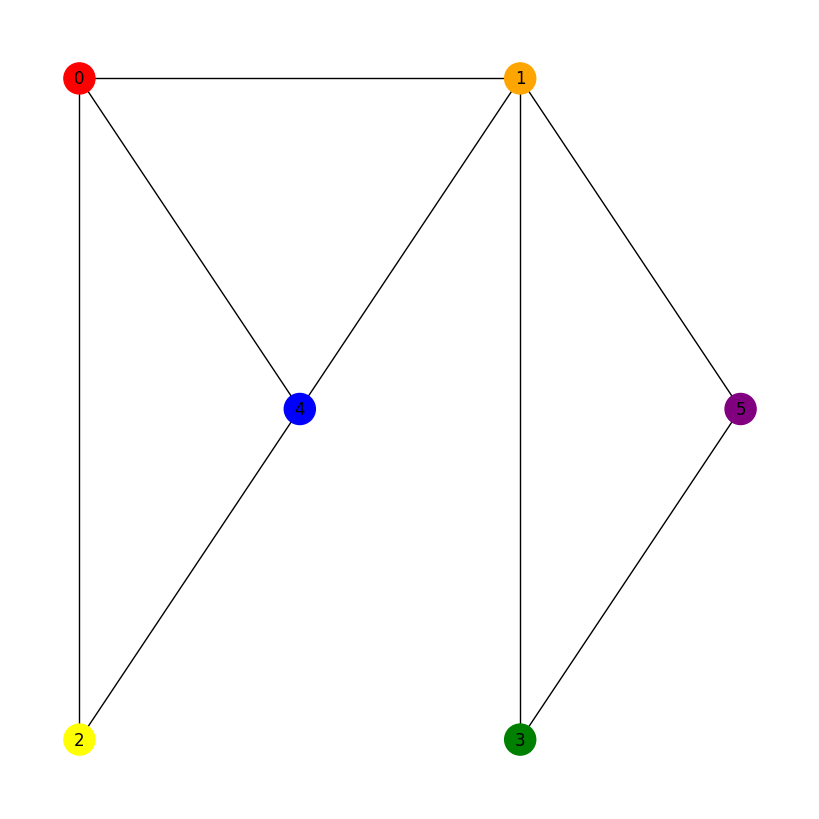

In [97]:
# Creating a graph with 5 vertices and 6 edges

edges = [[0, 1], [0, 2], [0, 4], [1, 3], [1, 4], [1, 5], [2, 4], [3, 5]] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 
#G.add_edges_from(edges) # Add edges to our graph 

G.add_node(0, nodetype='red', level=0)
G.add_node(1, nodetype='orange', level=2)
G.add_node(2, nodetype='yellow', level=0)
G.add_node(3, nodetype='green', level=2)
G.add_node(4, nodetype='blue', level=1)
G.add_node(5, nodetype='purple', level=3)


G.add_edges_from(edges) # Add edges to our graph 
pos = nx.multipartite_layout(G, subset_key="level") # Position layout of G

colors = [u[1] for u in G.nodes(data="nodetype")]

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color=colors, alpha=1,
    labels={node: node for node in G.nodes()} 
)



plt.savefig('intervalFamilyIntersectionGraph.png')

## Minimal Seperators



## Trees

Recall that a tree is a type of undirected graph where two vertices are connected by exactly one path. Like subgraphs we can have subtrees and we can have look at intersections of subtrees. This leads to an interesting characterization of chordal graphs.

**Theorem:** The intersection graph of a family of subtrees is chordal.
**Proof:** 

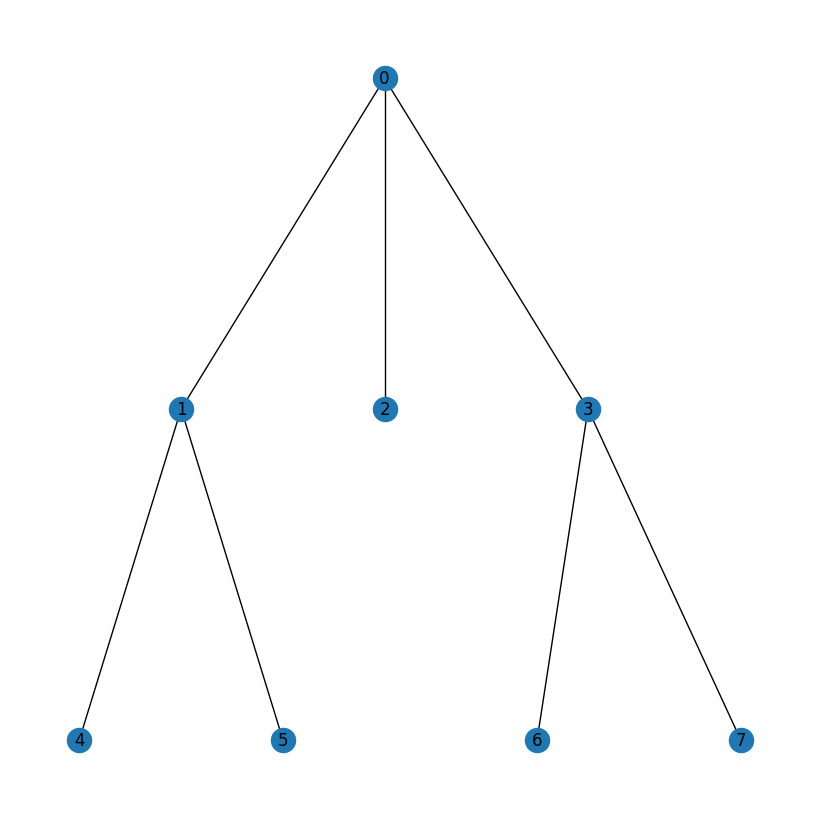

In [142]:
edges = [[0, 1], [0, 2], [0, 3], [1, 4], [1, 5], [3, 6], [3, 7]]

T = nx.Graph()
T.add_edges_from(edges)

pos = graphviz_layout(T, prog="dot")
nx.draw(T, pos, with_labels=True)
plt.show()

# Chordal Graphs and Databases

Chordal graphs have a heavy application in databases. As we saw earlier there are ways to define a hypergraph as a chordal graph. This is an important fact that is often utilized in database theory because if we are able to represent a database scheme as a hypergraph, more specifically an acyclic hypergraph, we are able to use characteristics of chordal graphs in order to query through our data. Below is an example of a database scheme and its hypergraph representation. 

<img src="Diagrams/dataScheme.png">

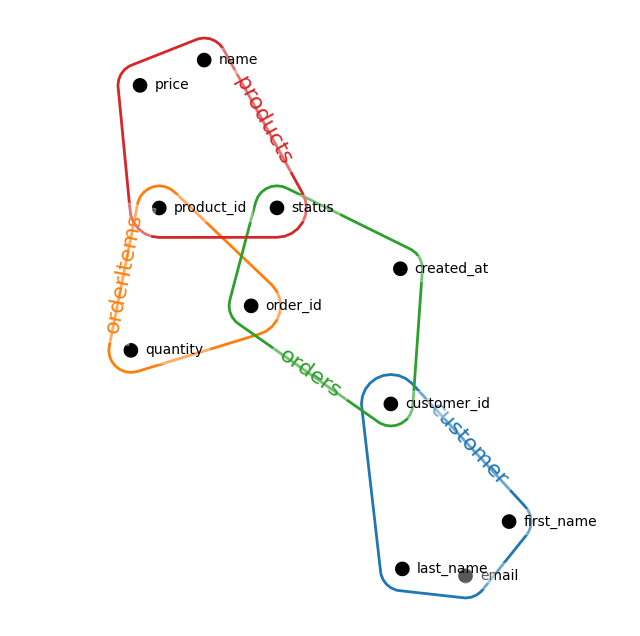

In [6]:
scenes = {
    "orders": ('order_id', 'customer_id', 'status', 'created_at'),
    "orderItems": ('order_id', 'product_id', 'quantity'),
    "customer": ('customer_id', 'first_name', 'last_name', 'email'),
    "products": ('product_id', 'name', 'price', 'status')
}

H = hnx.Hypergraph(scenes)



kwargs = {'layout_kwargs': {'seed': 18}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 10
    },
    edge_labels_kwargs={
        'fontsize': 16
    },
    edges_kwargs={
        'linewidths': 2
    },
    **kwargs
)



#plt.savefig('hypergraphDataScheme.png')

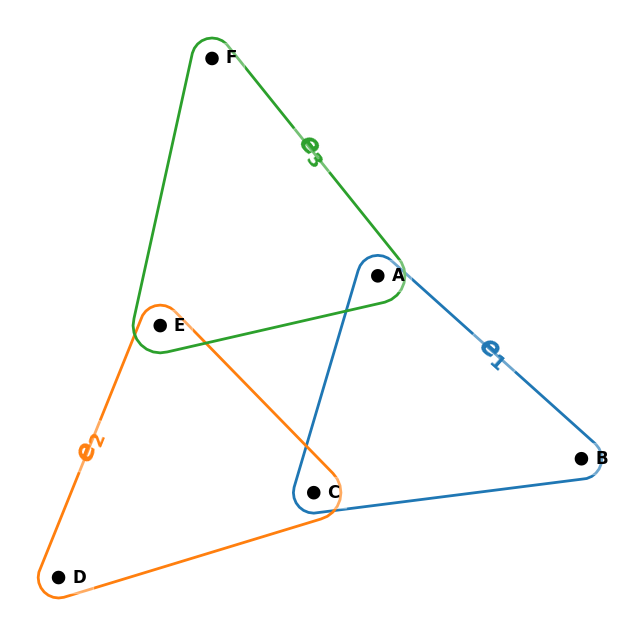

In [107]:
scenes = {
    '$e_1$': ('A', 'B', 'C'),
    '$e_2$': ('C', 'D', 'E'),
    '$e_3$': ('A', 'F', 'E')
}

H = hnx.Hypergraph(scenes)



kwargs = {'layout_kwargs': {'seed': 18}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 12
    },
    edge_labels_kwargs={
        'fontsize': 20
    },
    edges_kwargs={
        'linewidths': 2
    },
    **kwargs
)
